# В конце тетради функция для распознавания цифр из графического редактора и цифр от руки

In [99]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [100]:
#загрузка данных с mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()


In [101]:
x_train_org.shape #размерность массива

(60000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

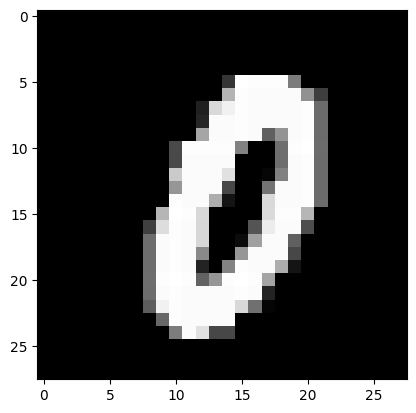

In [102]:
n = 34
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB'))#Отрисовка картинки. Можно менять convert.
plt.show # Вывод картинки

In [103]:
y_train_org[n]

0

In [104]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [105]:
#Нормализуем входные картинки
x_train = x_train.astype('float32')# преобразуем в цифры с плавающей точкой
x_train = x_train / 255 #загоняем число в диапозон от 0 до 1.
x_test = x_test.astype('float32')
x_test = x_test / 255

In [106]:
y_train_org[0]

5

In [107]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10) # 10 -- это размер, 10 потому что классов 10 (от 0 до 9)
y_test = utils.to_categorical(y_test_org, 10)

In [108]:
print(y_train.shape)#60к примеров, каждый размером 10

(60000, 10)


In [109]:
print(y_train[0])
print(y_train_org[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [110]:
print(y_train_org.shape)
print(y_train_org[36])

(60000,)
6


# **Создание NN**

In [111]:
model = Sequential()
model.add(Dense(800, input_dim=784, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))#softmax, потому что был использован one_hoc_encoding

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 400)                 │         320,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           4,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 952,410 (3.63 MB)

 Trainable params: 952,410 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

None


# **Обучение созданной NN**

fit - функция обучения нейронки
x_train, y_train - обучающая выборка, входные и выходные данные
batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
epochs - количество эпох, когда нейронка обучается на всех примерах выборки
verbose - 0 - не визуализировать ход обучения, 1 - визуализировать

In [113]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1) #x_train представлен в виде float32, y_train в виде словаря и 0-й и 1-цы (one_hoc_encoding)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8887 - loss: 0.3738
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.9764 - loss: 0.0773
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9848 - loss: 0.0486
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9899 - loss: 0.0317
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9919 - loss: 0.0253
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9938 - loss: 0.0188
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.9937 - loss: 0.0190
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9953 - loss: 0.0139
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9955 - loss: 0.0136
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9953 - loss: 0.0142
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9969 - loss: 0.0086
Epoch 12/15
469/469 ━━━━━━━━━━

In [114]:
#сохраняем и загружаем веса модели
model.save_weights('model.weights.h5')
model.load_weights('model.weights.h5')

# **Распознавание цифр**

<function matplotlib.pyplot.show(close=None, block=None)>

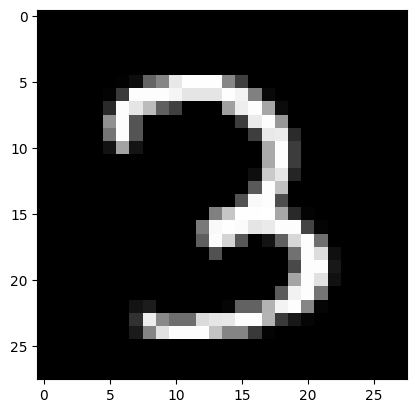

In [115]:
n_rec = 142 #номер тестовой цифры для распознавания
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show

In [116]:
y_test_org[n_rec]

3

In [117]:
#выбираем эту же цифру, но из выборки, которая была представлена в цислах/нормализована
x = x_test[n_rec]
print(x.shape)

(784,)


In [118]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массив примеров для распознавания
#Мы делаем массив из одного примера

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [119]:
#Распознаем наш пример
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [120]:
#выводим результат, это 10 цифр
print(prediction)

[[2.8943406e-19 1.2440040e-13 1.5865077e-10 1.0000000e+00 4.9140200e-19
  2.2393974e-13 1.4385634e-20 2.8438859e-12 3.8196325e-12 5.9302762e-16]]


In [121]:
sum(prediction[0])

1.0000000001656635

In [122]:
pred = np.argmax(prediction)
print('Ответ модели: ', pred)
print('Правильный ответ: ', y_test_org[n_rec])

Ответ модели:  3
Правильный ответ:  3


# **Распознавание своих чисел**

In [141]:
#Функция для распознавания чисел

import PIL.ImageOps #для инверсии цветов


def determination(img:str):
  pic = image.load_img(img, target_size=(28, 28), color_mode = 'grayscale') #загрузка изображения в переменную pic
  inv_pic = PIL.ImageOps.invert(pic) #инверсия цветов
  massive = image.img_to_array(inv_pic) #перевод в массив
  resh = massive.reshape(1, 784) #решейп
  norm = resh.astype('float32') #нормализация
  norm = norm / 255
  prediction = model.predict(norm)
  pred = np.argmax(prediction)
  return pred

In [146]:
determination('ni.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


2

In [145]:
determination('go.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


5

In [127]:
img = image.load_img('kyu.jpg', target_size=(28, 28), color_mode = 'grayscale')

In [61]:
import PIL.ImageOps #для инверсии цветов

In [128]:
#инверсия цветов
inv_img = PIL.ImageOps.invert(img)

In [79]:
x_train_org.shape

(60000, 28, 28)

In [129]:
#преобразую инверсированную картинку в numpy массив
go = image.img_to_array(inv_img)
go.shape

(28, 28, 1)

In [130]:
#Решейп
go_resh = go.reshape(1, 784)
go_resh.shape

(1, 784)

In [131]:
#нормализация
go_norm = go_resh.astype('float32')
go_norm = go_norm / 255

<function matplotlib.pyplot.show(close=None, block=None)>

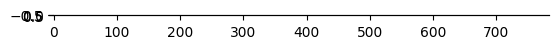

In [92]:
plt.imshow(Image.fromarray(go_resh).convert('RGB'))
plt.show

In [132]:
go_prediction = model.predict(go_norm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [96]:
print(go_prediction)

[[1.3248621e-04 1.2389363e-03 3.0995099e-02 5.1752605e-02 1.3758327e-02
  8.1402093e-01 7.4389548e-04 3.9355408e-02 2.3516022e-02 2.4486262e-02]]


In [133]:
sum(go_prediction[0])

1.0000000284053385

In [134]:
five = np.argmax(go_prediction)
print(five)

5
